# The Sparks Foundation - Data Science & Business Analytics intern
## Task 3 : Exploratory Data Analysis - Retail
## Author : Houssem Jabally

 #### Dataset Link : https://bit.ly/3i4rbWl

In [1]:
# Importing usefull libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib 
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
# Importing Data

df = pd.read_csv(r'C:\Users\MSI\The Sparks Foundation\SampleSuperstore.csv')

# Reading Data

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
# Checking for null values in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# Checking if there's a missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Ship Mode - 0%
Segment - 0%
Country - 0%
City - 0%
State - 0%
Postal Code - 0%
Region - 0%
Category - 0%
Sub-Category - 0%
Sales - 0%
Quantity - 0%
Discount - 0%
Profit - 0%


In [6]:
# Data Types of columns

print(df.dtypes)

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [7]:
# Data Description

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Finding unique Data
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
# Checking for duplicate values

df.duplicated().sum()

17

In [10]:
# Droping the duplicates
df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


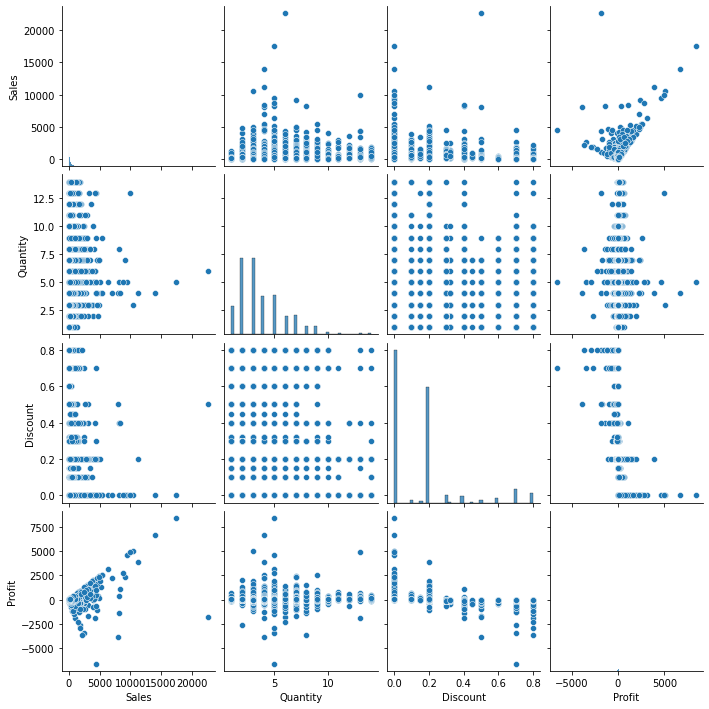

In [11]:
# Visualizing the Data using the pair plot

sns.pairplot(df, vars=["Sales", "Quantity", "Discount", "Profit"])

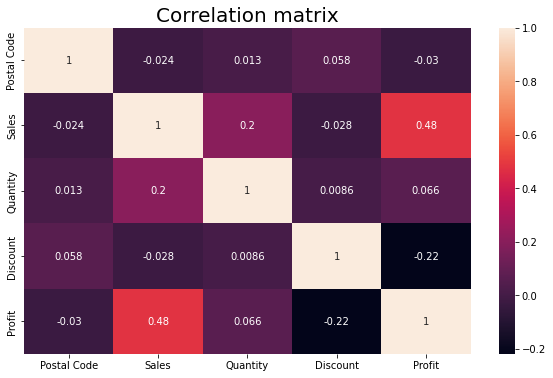

In [12]:
# Evaluating the correlation matrix

correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix",fontsize=20)

plt.show()

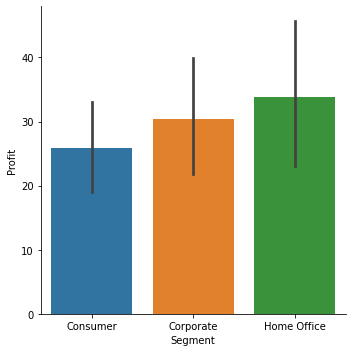

In [13]:
# Ploting relationships between categorical data like segment and profit , ship mode and profit , state and profit , etc.
sns.catplot(x="Segment",y="Profit",data=df,kind='bar',ci=97)

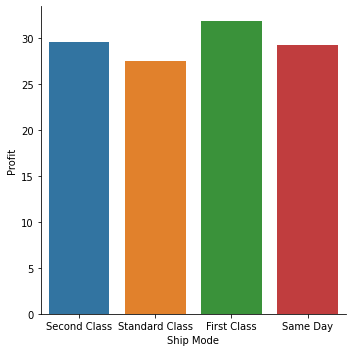

In [14]:
sns.catplot(x="Ship Mode",y="Profit",data=df,kind='bar',ci=None)

Text(0.5, 0.98, 'Profit by State')

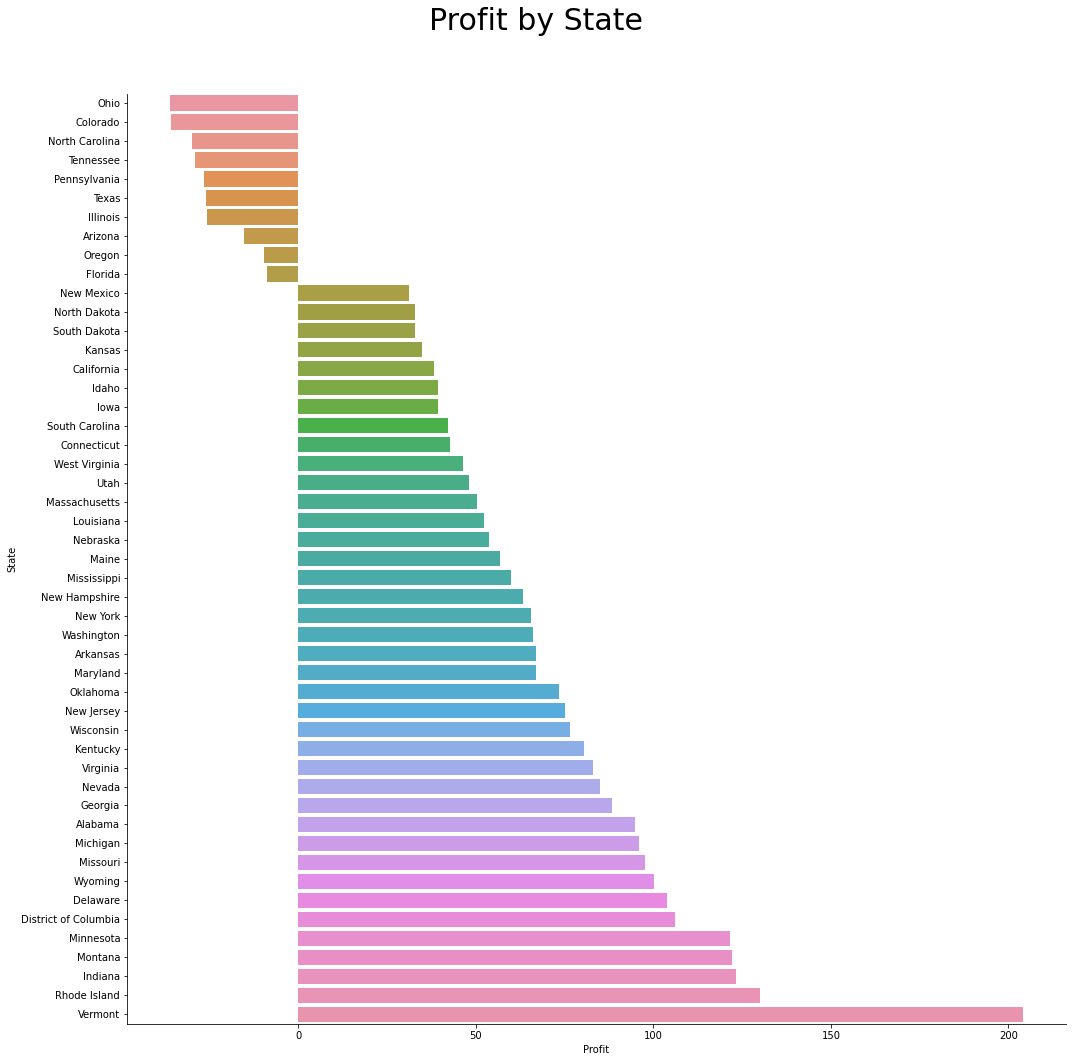

In [15]:
# Profit by State

order = df.groupby(["State"])["Profit"].mean().sort_values().index
rp = sns.catplot(y="State",x="Profit",data=df,kind='bar',ci=None,height=15,order=order)
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Profit by State',fontsize=30)

## We observe states like Ohio, Colorado, North Carolina yeild average loss

Text(0.5, 0.98, 'Profit by Category')

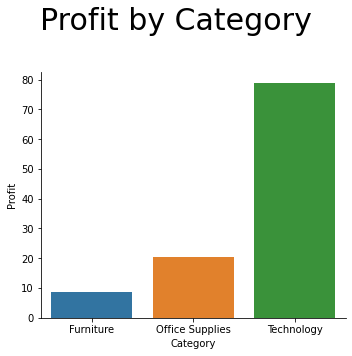

In [16]:
# Profit by Category

rp = sns.catplot(x="Category",y="Profit",data=df,kind="bar",ci=None)
rp.fig.subplots_adjust(top=0.8)
rp.fig.suptitle('Profit by Category',fontsize=30)

### We observe High Profits in the 'Technology' Category and Low Profits in the 'Furniture' Category

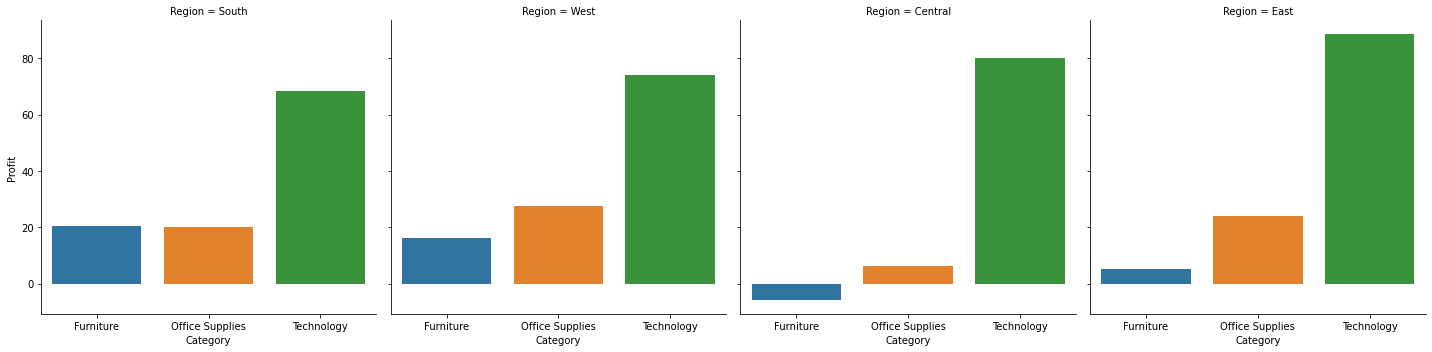

In [17]:
# Profit by Region

sns.catplot(x="Category",y="Profit",data=df,kind='bar',ci=None,col="Region")

## We observe that Selling Furtinure in Central region is not profitable

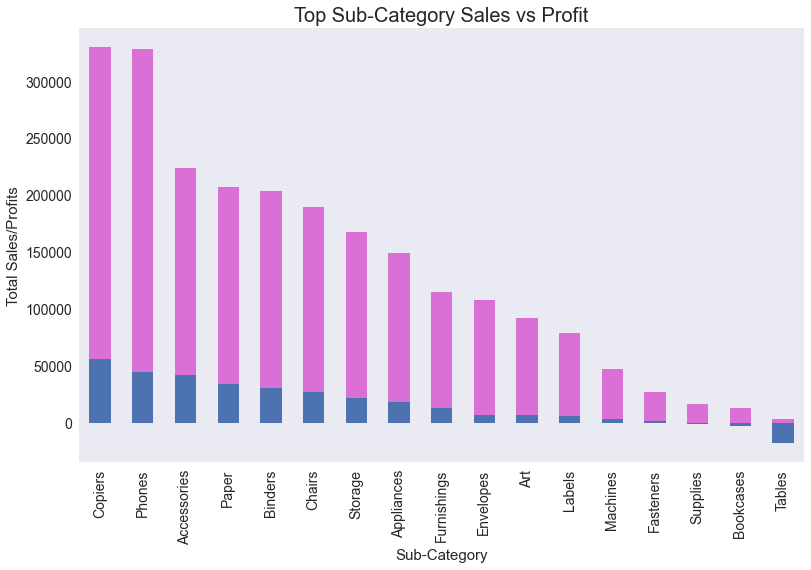

In [18]:
# computing top sub-categories in terms of sales from first 100 observations
top_subcategory_s = df.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
# computing top sub-categories in terms of profit from first 100 observations
top_subcategory_p = df.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

# plotting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar',figsize = (13,8),fontsize = 14, color = 'orchid')
top_subcategory_p.plot(kind = 'bar',figsize = (13,8),fontsize = 14)
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 20)
plt.grid()
plt.show()

### We observe Copiers and Phones have the highest sales and profit while tables has negative profit

<AxesSubplot:xlabel='count', ylabel='State'>

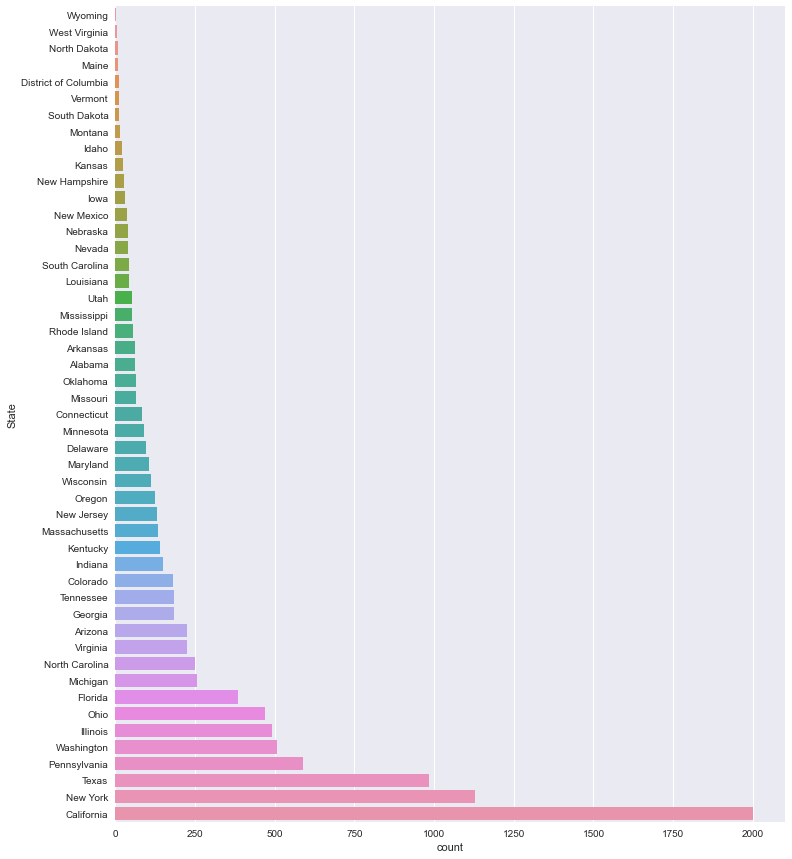

In [19]:
# Count plot
plt.subplots(figsize=(12,15))
order=df.groupby(['State'])["State"].count().sort_values().index
sns.countplot(y='State',data=df,order=order)

# Conclusion :
1. We find most of the customers in California, New York and Texas. Hence these states can be generate more profit.
2. States like Wyoming, North Dakota and West Virginia have little or no sales at all. Hence, these states need to be reviewed.
3. More profit is generated with the sales of Technology goods, hence Sales can be broadened on for this category. On the other hand, furniture sales have not generated significant profits.
4. Selling Furtinure in Central region is loss-making.
5. Selling Furtinure in Eastern region is least profitable among all other regions and categories.
6. Copiers and Phones have the highest sales and profit while tables has negative profit.